# Plots for the slides

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import hp
from hyperopt.pyll.stochastic import sample

## TPE - intuition

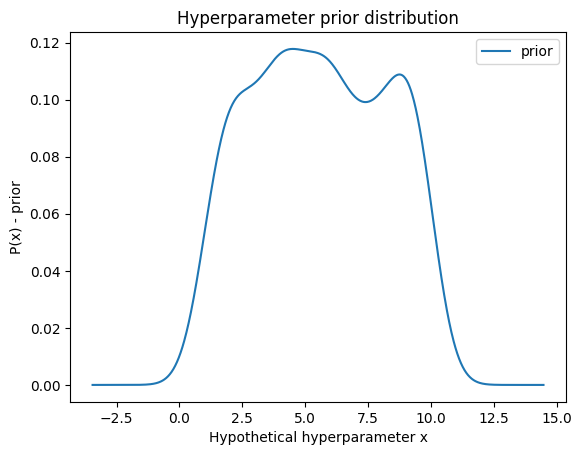

In [2]:
np.random.seed(42)

space = [{'example' : hp.uniform('example', 1, 10)}]
vals_ls = []
for i in range(500):
    v = sample(space)
    v = v[0]['example']
    vals_ls.append(v)

pd.Series(vals_ls).plot.kde(label='prior')

plt.title('Hyperparameter prior distribution')
plt.legend()
plt.xlabel('Hypothetical hyperparameter x')
plt.ylabel('P(x) - prior')
plt.show()

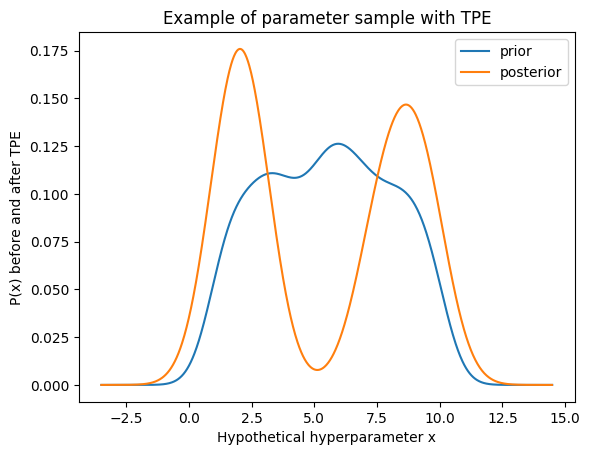

In [3]:
np.random.seed(42)

space = [{'example' : hp.uniform('example', 1, 10)}]
vals_ls = []

for i in range(500):
    v = sample(space)
    v = v[0]['example']
    vals_ls.append(v)

pd.Series(vals_ls).plot.kde(label='prior')

space = [{'example' : hp.uniform('example', 1, 3)}]
vals_ls = []

for i in range(250):
    v = sample(space)
    v = v[0]['example']
    vals_ls.append(v)
    
space = [{'example' : hp.uniform('example', 7, 10)}]
for i in range(250):
    v = sample(space)
    v = v[0]['example']
    vals_ls.append(v)

pd.Series(vals_ls).plot.kde(label='posterior')


plt.title('Example of parameter sample with TPE')
plt.legend()
plt.xlabel('Hypothetical hyperparameter x')
plt.ylabel('P(x) before and after TPE')
plt.show()

In [4]:
np.random.seed(237)

In [5]:
# create hypothetical f(x) - response surfice function
# in this case it is a 1-D function with 1 x, that is, 1 hyperparameter

noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

## TPE procedure

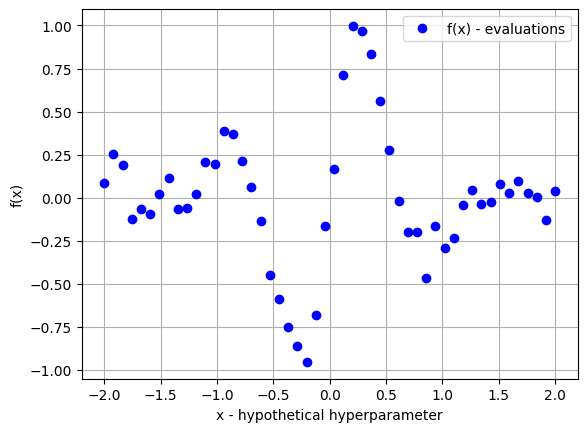

In [6]:
# Plot f(x) + uncertainty

x = np.linspace(-2, 2, 50).reshape(-1, 1)
fx = [f(x_i, noise_level=0.1) for x_i in x]

fx_min = [v for v in fx if v < -0.25]
idx = [True if x < -0.25 else False for x in fx]

plt.plot(x, fx, "bo", label="f(x) - evaluations")
# plt.plot(x[idx], fx_min, "ro", label="f(x) - best candidates")

len([x for x in fx if x >0]), len(fx)
plt.legend()
plt.grid()
plt.ylabel('f(x)')
plt.xlabel('x - hypothetical hyperparameter')
plt.show()

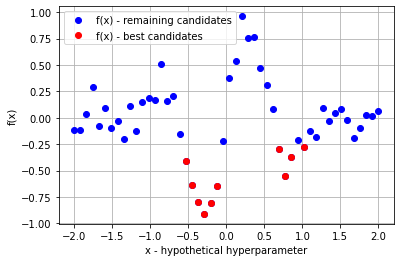

In [7]:
# Plot f(x) + uncertainty

x = np.linspace(-2, 2, 50).reshape(-1, 1)
fx = [f(x_i, noise_level=0.1) for x_i in x]

fx_min = [v for v in fx if v < -0.25]
idx = [True if x < -0.25 else False for x in fx]

plt.plot(x, fx, "bo", label="f(x) - remaining candidates")
plt.plot(x[idx], fx_min, "ro", label="f(x) - best candidates")

len([x for x in fx if x >0]), len(fx)
plt.legend()
plt.grid()
plt.ylabel('f(x)')
plt.xlabel('x - hypothetical hyperparameter')
plt.show()

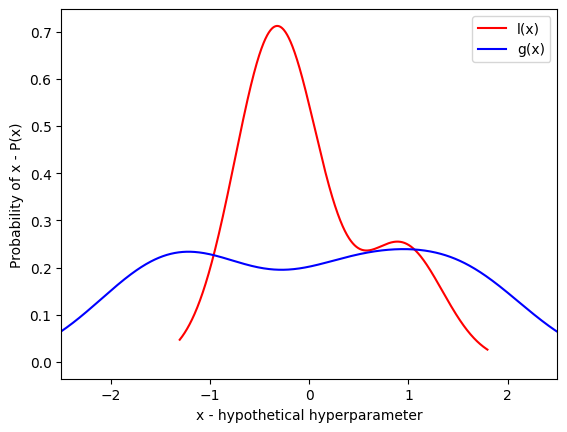

In [7]:
idx_g = [True if x >= -0.25 else False for x in fx]
idx_l = [True if x < -0.25 else False for x in fx]

pd.Series(x[idx_l].reshape(-1)).plot.density(label='l(x)', legend=True, color='r')
pd.Series(x[idx_g].reshape(-1)).plot.density(label='g(x)', legend=True, color='b')
plt.xlim(-2.5, 2.5)
plt.ylabel('Probability of x - P(x)')
plt.xlabel('x - hypothetical hyperparameter')
plt.show()

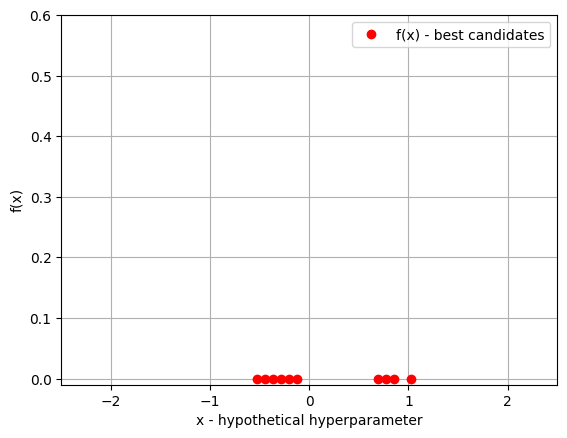

In [8]:
# Plot f(x) + uncertainty

x = np.linspace(-2, 2, 50).reshape(-1, 1)
fx = [f(x_i, noise_level=0.1) for x_i in x]

fx_min = [0 for v in fx if v < -0.25]
idx = [True if x < -0.25 else False for x in fx]

# plt.plot(x, fx, "bo", label="f(x) - remaining candidates")
plt.plot(x[idx], fx_min, "ro", label="f(x) - best candidates")

len([x for x in fx if x >0]), len(fx)
plt.legend()
plt.grid()
plt.ylabel('f(x)')
plt.xlabel('x - hypothetical hyperparameter')
plt.ylim(-0.01,0.6)
plt.xlim(-2.5, 2.5)
plt.show()

(-2.5, 2.5)

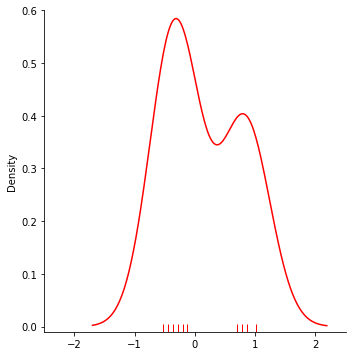

In [10]:
sns.displot(x[idx_l].reshape(-1), kind="kde", rug=True, color='r')
plt.ylim(-0.01,0.6)
plt.xlim(-2.5, 2.5)

(-2.5, 2.5)

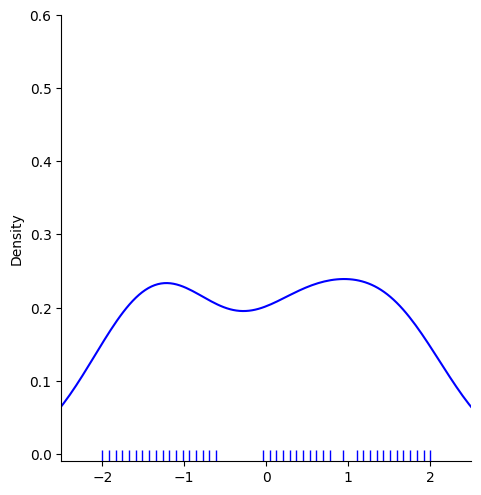

In [9]:
sns.displot(x[idx_g].reshape(-1), kind="kde", rug=True, color='b')
plt.ylim(-0.01,0.6)
plt.xlim(-2.5, 2.5)